### Building Neural Networks With PyTorch [Reference: ](https://deeplizard.com/learn/video/k4jY9L8H89U)

In [1]:
import torch

In [2]:
import torch.nn as nn
import torch.nn.functional as F

### PyTorch's  <span style="color: magenta;">nn.Module</span> Class

Each layer in a neural network has two primary components:

- A transformation (code)
- A collection of weights (data)

**Within the nn package, there is a class called Module, 
and it is the base class for all of neural network modules which includes layers.**

PyTorch nn.Modules Have A <span style="color: magenta;">forward()</span> Method

The tensor input is passed forward though the network.

### PyTorch’s **nn.functional** Package
- When we implement the forward() method of our nn.Module subclass, we will typically use functions from the nn.functional package. 

- This package provides us with many neural network operations that we can use for building layers. In fact, many of the nn.Module layer classes use nn.functional functions to perform their operations.

More detailed version:

- Create a neural network class that extends the ***nn.Module*** base class.
- In the class constructor, define the network’s layers as class attributes using pre-built layers from torch.nn.
- Use the network’s layer attributes as well as operations from the nn.functional API to define the network’s forward pass.


Specify the nn.Module class in parentheses on line 1.
Insert a call to the super class constructor on line 3 inside the constructor.

In [3]:
class Network(nn.Module): # inheritance 
    def __init__(self):
        super().__init__() # call to the constructor of base class
        # conv layers below
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        # fully connected layers below
        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)

    def forward(self, t):
        t = self.layer(t)
        return t

**Parameters that we used when constructing our layers.**

- Hyperparameters
- Data dependent hyperparameters

Convolutional layers:
- in_channels
- out_channels
- kernel_size


Linear layers:
- in_features
- out_features

|Layer	|Param name|Param value|The param value is|
|-------|----------|-----------|------------------|
|conv1	|in_channels|1|	the number of color channels in the input image.|
|conv1	|kernel_size|	5|	a hyperparameter.|
|conv1	|out_channels|	6|	a hyperparameter.|
|conv2	|in_channels|	6|	the number of out_channels in previous layer.|
|conv2	|kernel_size|	5|	a hyperparameter.|
|conv2	|out_channels|	12|	a hyperparameter (higher than previous conv layer).|
|fc1	|in_features|	12\*4\*4|	the length of the flattened output from previous layer.|
|fc1	|out_features|	120|	a hyperparameter.|
|fc2	|in_features|	120|	the number of out_features of previous layer.|
|fc2	|out_features|	60|	a hyperparameter (lower than previous linear layer).|
|out	|in_features|	60|	the number of out_channels in previous layer.|
|out	|out_features|	10|	the number of prediction classes.|

In [4]:
network = Network()

In [5]:
print(network)

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)


Reference: [Convolutions](https://deeplizard.com/learn/video/YRhxdVk_sIs)\
For better and thorough theoretical understanding refer this: [Stanford-CS231](https://cs231n.github.io/convolutional-networks/)\
***input channel*** is referred to the number of input channel an image has it is the first paramneter of Conv2d:\
input_channel = 1 when an image is a grayscale  
input_channel = 3 when an image is at RGB scale

### Weights
#### PyTorch Parameter Class
To keep track of all the weight tensors inside the network. PyTorch has a special class called Parameter. The Parameter class extends the tensor class, and so the weight tensor inside every layer is an instance of this Parameter class. This is why we see the Parameter containing text at the top of the string representation output.

***For the convolutional layers, the weight values live inside the filters, and in code, the filters are actually the weight tensors themselves.***

In [6]:
network.conv1

Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))

For the first conv layer, we have ***1 color channel*** that should be convolved by ***6 filters*** of ***size 5x5*** to produce ***6 output channels***. This is how we interpret the values inside our layer constructor.

In [7]:
network.conv1.weight.shape

torch.Size([6, 1, 5, 5])

In [8]:
network.conv1.weight[0][0][0]

tensor([ 0.1032,  0.0652,  0.1226,  0.0416, -0.0285], grad_fn=<SelectBackward>)

A convolutional process is consist of elementwise product of kernel values with the image values.

In [9]:

in_features = torch.tensor([1,2,3,4,5,6], dtype=torch.float32)

weight_matrix = torch.tensor([
    [1,2,3,4,5,6],
    [2,3,4,5,5,6],
    [3,4,5,6,5,6]
], dtype=torch.float32)

weight_matrix.matmul(in_features)


tensor([ 91., 101., 111.])

In [10]:
in_features

tensor([1., 2., 3., 4., 5., 6.])

In [11]:
out_features=3

In [12]:
fc = nn.Linear(in_features=6, out_features=3, bias=True)

In [13]:
fc.weight = nn.Parameter(weight_matrix)

In [14]:
fc(in_features)

tensor([ 90.7988, 100.6843, 110.9902], grad_fn=<AddBackward0>)

In [15]:
fc.bias

Parameter containing:
tensor([-0.2012, -0.3157, -0.0098], requires_grad=True)

**Mathematical Notation Of The Linear Transformation**

Sometimes we'll see linear layer operation referred to as

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>y</mi>
  <mo>=</mo>
  <mi>A</mi>
  <mi>x</mi>
  <mo>+</mo>
  <mi>b</mi>
  <mo>.</mo>
</math>

In this equation, we have the following:

|Variable |Definition|
|---------|----------|
|A |       Weight matrix tensor|
|x|Input tensor|
|b|Bias tensor|
|y|Output tensor|

We'll note that this is similar to the equation for a line

y
=
m
x
+
b
.

Convolution and pooling operations are reduction operations on the height and width dimensions.

We started with a 1 x 28 x 28 input tensor. This gives a single color channel, 28 x 28 image, and by the time our tensor arrives at the first linear layer, the dimensions have changed.

In [16]:
class Network(nn.Module): # inheritance 
    def __init__(self):
        super().__init__() # call to the constructor of base class
        
        # conv layers below
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        # fully connected layers below
        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)

    def forward(self, t):
        
        t = t
        # hidden conv layer 1
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        # hidden conv layer 2
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (4) hidden linear layer
        t = t.reshape(-1, 12 * 4 * 4)
        t = self.fc1(t)
        t = F.relu(t)

        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)

        # (6) output layer
        t = self.out(t)
        t = F.softmax(t, dim=1)
        return t

In [48]:
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

### What Is Forward Propagation?
Forward propagation is the process of transforming an input tensor to an output tensor. At its core, a neural network is a function that maps an input tensor to an output tensor, and forward propagation is just a special name for the process of passing an input to the network and receiving the output from the network.

In [17]:
import torchvision
import torchvision.transforms as transforms 

train_set = torchvision.datasets.FashionMNIST(
    root='~/Documents/personal_project/image/deeplearning-image/notebook/data/'
    ,train=True
    ,download=False
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

image, label = train_set[0]

print(image.shape)

image, label = train_set[0]

label

image.shape

torch.Size([1, 28, 28])


torch.Size([1, 28, 28])

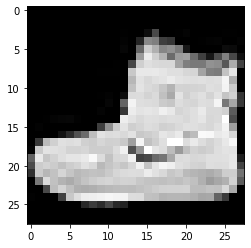

In [18]:
from matplotlib import pyplot as plt

# image[0].shape == image.squeeze().shape

plt.imshow(image[0], cmap="gray")

### Passing A Single Image To The Network

In [19]:
network = Network()

When we pass a tensor to our network, the network is expecting a batch, so even if we want to pass a single image, we still need a batch.

(batch_size, in_channels, height, width)

In [20]:
# adding another dimension as batch size
image.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [21]:
pred = network.forward(image.unsqueeze(0))

In [22]:
pred.shape

torch.Size([1, 10])

In [23]:
pred.argmax(dim=1)

tensor([2])

In [24]:
F.softmax(pred, dim=1).max()

tensor(0.1009, grad_fn=<MaxBackward1>)

In [25]:
F.softmax(pred, dim=1)*100

tensor([[ 9.9424,  9.9623, 10.0894,  9.9609, 10.0743, 10.0269, 10.0440, 10.0466,
          9.9214,  9.9317]], grad_fn=<MulBackward0>)

***Note the predictions are close to 10% for each class. This is because of the random initialization of weights and the netowrk is guessing randomly.***

In [26]:
data_loader = torch.utils.data.DataLoader(
                    train_set,
                    batch_size=10
                )

In [27]:
batch = next(iter(data_loader))

In [28]:
images, labels = batch

In [29]:
images.shape

torch.Size([10, 1, 28, 28])

In [30]:
preds = network.forward(images)

In [31]:
preds.max(dim=1)

torch.return_types.max(
values=tensor([0.1089, 0.1091, 0.1088, 0.1087, 0.1094, 0.1089, 0.1092, 0.1096, 0.1090,
        0.1086], grad_fn=<MaxBackward0>),
indices=tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [32]:
labels

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])

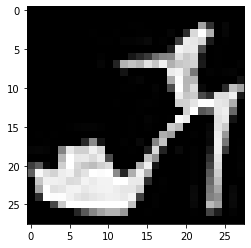

In [33]:
for image in images: 
    plt.imshow(image[0], cmap="gray")

In [34]:
preds.argmax()

tensor(72)

In [35]:
preds

tensor([[0.0942, 0.0962, 0.1089, 0.0961, 0.1074, 0.1027, 0.1044, 0.1047, 0.0921,
         0.0932],
        [0.0943, 0.0965, 0.1091, 0.0961, 0.1079, 0.1024, 0.1040, 0.1049, 0.0920,
         0.0927],
        [0.0939, 0.0954, 0.1088, 0.0961, 0.1078, 0.1015, 0.1056, 0.1056, 0.0921,
         0.0933],
        [0.0939, 0.0958, 0.1087, 0.0957, 0.1079, 0.1017, 0.1053, 0.1054, 0.0924,
         0.0932],
        [0.0939, 0.0956, 0.1094, 0.0955, 0.1074, 0.1017, 0.1051, 0.1054, 0.0924,
         0.0936],
        [0.0940, 0.0971, 0.1089, 0.0968, 0.1069, 0.1019, 0.1050, 0.1054, 0.0918,
         0.0923],
        [0.0943, 0.0964, 0.1092, 0.0963, 0.1081, 0.1023, 0.1045, 0.1046, 0.0922,
         0.0921],
        [0.0935, 0.0968, 0.1096, 0.0966, 0.1067, 0.1016, 0.1051, 0.1053, 0.0917,
         0.0932],
        [0.0941, 0.0954, 0.1090, 0.0964, 0.1075, 0.1017, 0.1058, 0.1053, 0.0920,
         0.0928],
        [0.0946, 0.0956, 0.1086, 0.0969, 0.1072, 0.1021, 0.1051, 0.1048, 0.0918,
         0.0933]], grad_fn=<

CNN Output Size Formula
Let's have a look at the formula for computing the output size of the tensor after performing convolutional and pooling operations.

Suppose we have an n×n input.
Suppose we have an f×f filter.
Suppose we have a padding of p and a stride of s.

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>O</mi>
  <mo>=</mo>
  <mfrac>
    <mrow>
      <mi>n</mi>
      <mo>&#x2212;<!-- − --></mo>
      <mi>f</mi>
      <mo>+</mo>
      <mn>2</mn>
      <mi>p</mi>
    </mrow>
    <mi>s</mi>
  </mfrac>
  <mo>+</mo>
  <mn>1</mn>
</math>

This value will be the height and width of the output. However, if the input or the filter isn't a square, this formula needs to be applied twice, once for the width and once for the height.

CNN Output Size Formula (Non-Square)
Suppose we have an nh×nw input.
Suppose we have an fh×fw filter.
Suppose we have a padding of p and a stride of s.
The height of the output size Oh is given by this formula:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msub>
    <mi>O</mi>
    <mrow class="MJX-TeXAtom-ORD">
      <mi>h</mi>
    </mrow>
  </msub>
  <mo>=</mo>
  <mfrac>
    <mrow>
      <msub>
        <mi>n</mi>
        <mrow class="MJX-TeXAtom-ORD">
          <mi>h</mi>
        </mrow>
      </msub>
      <mo>&#x2212;<!-- − --></mo>
      <msub>
        <mi>f</mi>
        <mrow class="MJX-TeXAtom-ORD">
          <mi>h</mi>
        </mrow>
      </msub>
      <mo>+</mo>
      <mn>2</mn>
      <mi>p</mi>
    </mrow>
    <mi>s</mi>
  </mfrac>
  <mo>+</mo>
  <mn>1</mn>
</math>

The width of the output size 
O
w
 is given by this formula:

O
w
=
n
w
−
f
w
+
2
p
s
+
1

## Calculate the Loss

In [51]:
preds = network.forward(images)

In [52]:
loss = F.cross_entropy(preds, labels) # Calculating the loss

In [53]:
loss

tensor(2.3028, grad_fn=<NllLossBackward>)

In [58]:
preds.argmax(dim=1).eq(labels).sum()

tensor(2)

In [59]:
get_num_correct(preds, labels)

2

In [64]:
network.conv1.weight.grad

In [65]:
loss.backward()

In [67]:
network.conv1.weight.grad

tensor([[[[ 3.2158e-04,  3.9926e-04,  3.5125e-04,  2.5246e-04,  1.9107e-04],
          [ 2.6134e-04,  2.8553e-04,  1.7251e-04,  1.9426e-05,  8.8649e-05],
          [ 3.1311e-04,  1.8029e-04,  1.1959e-04,  3.3751e-05, -1.3433e-05],
          [ 3.1411e-04,  2.2721e-04,  2.1120e-04,  6.7621e-05,  7.7853e-05],
          [ 4.0093e-04,  2.9466e-04,  2.4545e-04,  1.2809e-04,  8.1209e-05]]],


        [[[-4.1127e-04, -4.6500e-04, -2.3585e-04, -3.9088e-04, -4.9973e-04],
          [-3.6156e-04, -4.4287e-04, -2.6380e-04, -2.9191e-04, -5.0436e-04],
          [-2.0014e-04, -2.8073e-04, -1.5068e-04, -2.3787e-04, -5.1828e-04],
          [-5.9001e-05, -8.2673e-05, -2.4294e-05, -1.9785e-04, -3.4458e-04],
          [-4.6936e-05, -3.0377e-05, -6.9102e-05, -1.3107e-04, -2.1947e-04]]],


        [[[ 5.7911e-05,  6.0284e-05,  1.7265e-05,  1.1743e-04, -1.5675e-04],
          [ 1.2077e-04,  6.2909e-05,  9.3410e-05,  8.3096e-06, -1.9422e-04],
          [ 4.7128e-05,  2.0519e-05, -8.7302e-06, -1.2245e-04, -2.05